In [83]:
import os
# from osgeo import gdal
import numpy as np
from skimage.io import imread, imsave
from pathlib import Path
import random
  

In [67]:
def readImage(fileName):
    if not Path(fileName).is_file():
        print(fileName + "文件无法打开")
    img = imread(fileName)
    # #     The different color bands/channels are stored in the third dimension, 
    # such that a gray-image is MxN, 
    # an RGB-image MxNx3 and 
    # an RGBA-image MxNx4.
    return img

def saveImage(img_arr, fileName):
    imsave(fileName, img_arr)
#     return Path(fileName).is_file()


In [68]:
# Test read file

input_image_path = "Data/Aerial/RGB/0.tif"
gt_image_path = "Data/Aerial/GT/0.tif"

input_image_path = "Data/Aerial/RGB.png"
gt_image_path = "Data/Aerial/GT.png"

img_rgb = readImage(input_image_path)
img_gt = readImage(gt_image_path)

saveImage(img_rgb, 'Data/Aerial/RGB.Copy.png')
saveImage(img_gt, 'Data/Aerial/GT.Copy.png')


In [58]:
img_rgb.shape, img_gt.shape

((1000, 1000, 3), (1000, 1000))

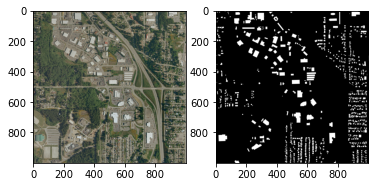

In [60]:
import matplotlib.pyplot as plt

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.subplot(1, 2, 2)
plt.imshow(img_gt, cmap='gray')
plt.show()

In [50]:
# save image.

In [76]:
def ImgCrop(ImgPath, SavePath, CropSize, RepetitionRate, extension='.png'):
    
    Path(SavePath).mkdir(parents=True, exist_ok=True)
    
    img = readImage(ImgPath)
    width = img.shape[1]
    height = img.shape[0]
    print(f"Image Size (H, W):{height, width}")
 
    #  获取当前文件夹的文件个数len,并以len+1命名即将裁剪得到的图像
    #  new_name = len(os.listdir(SavePath)) + 1
    #  裁剪图片,重复率为RepetitionRate
    new_name = 0
    for i in range(int((height - CropSize * RepetitionRate) / (CropSize * (1 - RepetitionRate)))):
        for j in range(int((width - CropSize * RepetitionRate) / (CropSize * (1 - RepetitionRate)))):
            #  如果图像是单波段
            if(len(img.shape) == 2):
                cropped = img[int(i * CropSize * (1 - RepetitionRate)): int(i * CropSize * (1 - RepetitionRate)) + CropSize,
                              int(j * CropSize * (1 - RepetitionRate)): int(j * CropSize * (1 - RepetitionRate)) + CropSize]
            #  如果图像是多波段
            else:
                cropped = img[int(i * CropSize * (1 - RepetitionRate)): int(i * CropSize * (1 - RepetitionRate)) + CropSize,
                              int(j * CropSize * (1 - RepetitionRate)): int(j * CropSize * (1 - RepetitionRate)) + CropSize, :]
            #  写图像
            saveImage(cropped, f"{SavePath}/{str(new_name)}{extension}")
            #  文件名 + 1
            new_name = new_name + 1
    #  向前裁剪最后一列
    for i in range(int((height-CropSize*RepetitionRate)/(CropSize*(1-RepetitionRate)))):
        if(len(img.shape) == 2):
            cropped = img[int(i * CropSize * (1 - RepetitionRate)): int(i * CropSize * (1 - RepetitionRate)) + CropSize,
                          (width - CropSize): width]
        else:
            cropped = img[int(i * CropSize * (1 - RepetitionRate)): int(i * CropSize * (1 - RepetitionRate)) + CropSize,
                          (width - CropSize): width, :]
        #  写图像
        saveImage(cropped, f"{SavePath}/{str(new_name)}{extension}")
        new_name = new_name + 1
    #  向前裁剪最后一行
    for j in range(int((width - CropSize * RepetitionRate) / (CropSize * (1 - RepetitionRate)))):
        if(len(img.shape) == 2):
            cropped = img[(height - CropSize): height,
                          int(j * CropSize * (1 - RepetitionRate)): int(j * CropSize * (1 - RepetitionRate)) + CropSize]
        else:
            cropped = img[(height - CropSize): height,
                          int(j * CropSize * (1 - RepetitionRate)): int(j * CropSize * (1 - RepetitionRate)) + CropSize, :]
        saveImage(cropped, f"{SavePath}/{str(new_name)}{extension}")
        #  文件名 + 1
        new_name = new_name + 1
    #  裁剪右下角
    if(len(img.shape) == 2):
        cropped = img[(height - CropSize): height,
                      (width - CropSize): width]
    else:
        cropped = img[(height - CropSize): height,
                      (width - CropSize): width, : 
                      ]
    saveImage(cropped, f"{SavePath}/{str(new_name)}{extension}")
    new_name = new_name + 1

In [77]:
def RandomCrop(ImagePath, LabelPath, ImgSavePath, LabelSavePath, CropSize, CutNum, extension='.png'):
    
    Path(ImgSavePath).mkdir(parents=True, exist_ok=True)
    Path(LabelSavePath).mkdir(parents=True, exist_ok=True)
    
    img = readImage(ImagePath)
    width = img.shape[1]
    height = img.shape[0]
    label = readImage(LabelPath)
#  获取当前文件夹的文件个数len,并以len+1命名即将裁剪得到的图像
#     fileNum = len(os.listdir(IamgeSavePath))
    fileNum = 0
    new_name = fileNum + 1
    while(new_name < CutNum + fileNum + 1):
        #  生成剪切图像的左上角XY坐标
        UpperLeftX = random.randint(0, height - CropSize)
        UpperLeftY = random.randint(0, width - CropSize)
        if(len(img.shape) == 2):
            imgCrop = img[UpperLeftX: UpperLeftX + CropSize,
                          UpperLeftY: UpperLeftY + CropSize]
        else:
            imgCrop = img[UpperLeftX: UpperLeftX + CropSize,
                          UpperLeftY: UpperLeftY + CropSize, :]
        if(len(label.shape) == 2):
            labelCrop = label[UpperLeftX: UpperLeftX + CropSize,
                              UpperLeftY: UpperLeftY + CropSize]
        else:
            labelCrop = label[UpperLeftX: UpperLeftX + CropSize,
                              UpperLeftY: UpperLeftY + CropSize, :]
        saveImage(imgCrop, f"{ImgSavePath}/{str(new_name)}{extension}" )
        saveImage(labelCrop,f"{LabelSavePath}/{str(new_name)}{extension}")
        new_name = new_name + 1

In [78]:
RGB_Path = "Data/Aerial/RGB.png"
RGB_SavePath = "Data/Aerial/RGBPNG"

GT_Path = "Data/Aerial/GT.png"
GT_SavePath = "Data/Aerial/GTPNG"

CropSize = 200 # 128
RepetitionRate = 0

ImgCrop(RGB_Path, RGB_SavePath, CropSize, RepetitionRate)
ImgCrop(GT_Path, GT_SavePath, CropSize, RepetitionRate)

Image Size (H, W):(1000, 1000)
Image Size (H, W):(1000, 1000)


temp/123.png


In [85]:
ImagePath = "Data/Aerial/RGB.png"
LabelPath = "Data/Aerial/GT.png"
ImgSavePath = "Data/Aerial/RGBRandom"
LabelSavePath = "Data/Aerial/GTRandom"
CropSize = 200
CutNum = 100

RandomCrop(ImagePath, LabelPath, ImgSavePath, LabelSavePath, CropSize, CutNum)